**Ordinary Least Squares**

In [3]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

# OLS estimation  
$y = \beta_0 +\sum_{i=1}^{j}\beta_ix_i$

In [13]:
# artificial data
nsample = 100
x = np.linspace(0, 10, nsample)
X = np.column_stack((x,x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [14]:
# add a columnn of 1s as the intercept
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [15]:
# fit the estimation
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.910e+06
Date:                Sun, 07 May 2017   Prob (F-statistic):          1.09e-238
Time:                        19:57:40   Log-Likelihood:                -147.98
No. Observations:                 100   AIC:                             302.0
Df Residuals:                      97   BIC:                             309.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.6438      0.317      2.029      0.0

In [16]:
print('Parameters: ', model.params)
print('R2: ', model.rsquared)
print('R2 adjust: ', model.rsquared_adj)
print('BIC:', model.bic)

Parameters:  [  0.64376456   0.13944922  10.00057593]
R2:  0.999987596032
R2 adjust:  0.99998734028
BIC: 309.766111213


# OLS non-linear curve but linear in parameters
simulate artificial data

In [17]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20 ,nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5 , 0.5, -0.02, 5.0]
y = np.dot(X, beta) + np.random.normal(size=nsample)

In [18]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     39.90
Date:                Sun, 07 May 2017   Prob (F-statistic):           7.44e-13
Time:                        19:59:43   Log-Likelihood:                -76.466
No. Observations:                  50   AIC:                             160.9
Df Residuals:                      46   BIC:                             168.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4996      0.061      8.163      0.0

In [20]:
print('parameters:', model.params)
print('standard errors', model.bse)
print('pridict values', model.predict())

parameters: [ 0.4995828   0.37256221 -0.02091828  4.9918062 ]
standard errors [ 0.06120021  0.2405852   0.00537342  0.39682443]
pridict values [  4.46884912   4.90253522   5.30495538   5.65580528   5.94210832
   6.16034766   6.31704398   6.42768419   6.51417696   6.60125319
   6.71240278   6.86601534   7.07235877   7.33189235   7.63519121
   7.96449486   8.29662516   8.60679444   8.87267801   9.07808211
   9.21560442   9.2878503    9.30700472   9.29283027   9.26942028
   9.26124031   9.28910855   9.36677544   9.49866452   9.67914564
   9.89345999  10.12014494  10.33456027  10.51293649  10.63628011
  10.69349422  10.68320166  10.61397131  10.50291022  10.37285301
  10.24861015  10.15289172  10.10257619  10.10593731  10.16128482
  10.25724209  10.37461529  10.48954689  10.5774354   10.61697728]


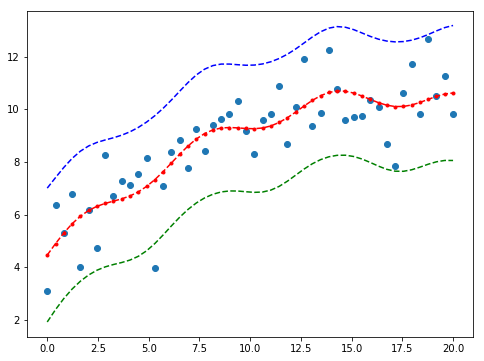

In [23]:
# draw a plot to compare the true relationship to OLS predictions
prstd, iv_l, iv_u = wls_prediction_std(model)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x,y,'o')
ax.plot(x, model.fittedvalues, 'r--.')
ax.plot(x, iv_u, 'b--')
ax.plot(x, iv_l, 'g--')
plt.show()

# OLS with dummary variables

In [24]:
nsample = 50
groups = np.zeros(nsample, np.int)
groups[20:40]=1
groups[40:]=2

dummy = sm.categorical(groups, drop=True)
dummy

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.

In [27]:
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X, prepend=False)
beta = [1., 3, -3, 10]
y_true = np.dot(X,beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [28]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     481.1
Date:                Sun, 07 May 2017   Prob (F-statistic):           9.98e-35
Time:                        20:13:36   Log-Likelihood:                -75.017
No. Observations:                  50   AIC:                             158.0
Df Residuals:                      46   BIC:                             165.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9602      0.074     13.023      0.0

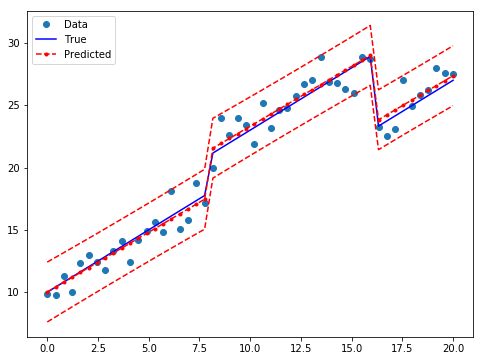

In [29]:
prstd, iv_l, iv_u = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, model.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

# Hypothesis Test

## F test
Hypothesis that both coefficients on the dummy variables are equals to zero, that is, $R \times \beta =0$. An F test leads us to strongly reject the null hypothesis of identical constant in the 3 groups.

In [30]:
R = [[0,1,0,0],[0,0,1,0]]
R = np.array(R)
print(model.f_test(R))

<F test: F=array([[ 96.3393611]]), p=3.5786146366921434e-17, df_denom=46, df_num=2>


You can also use formula-like syntax to test hypotheses

In [31]:
print(model.f_test('x2=x3=0'))

<F test: F=array([[ 96.3393611]]), p=3.578614636692155e-17, df_denom=46, df_num=2>


In [32]:
print(model.f_test('x1=0'))

<F test: F=array([[ 169.60645048]]), p=4.8651797070571883e-17, df_denom=46, df_num=1>


## Small group effects

In [36]:
beta = [0.001, 0.3, -0.0, 10]
y_true = np.dot(X, beta)
y = y_true + np.random.normal(size=nsample)
model = sm.OLS(y, X).fit()
print(model.f_test(R))

<F test: F=array([[ 2.3706532]]), p=0.10473993670031208, df_denom=46, df_num=2>


In [37]:
print(model.f_test('x2=x3=0'))

<F test: F=array([[ 2.3706532]]), p=0.10473993670031208, df_denom=46, df_num=2>


In [38]:
print(model.f_test('x1=0'))

<F test: F=array([[ 3.46396904]]), p=0.06911726843649252, df_denom=46, df_num=1>


## Multicollinearity
The Longley dataset is well known to have high multicollinearity. That is, the exogenous predictors are highly correlated. This is problematic because it can affect the stability of our coefficient estimates as we make minor changes to model specification.

In [39]:
from statsmodels.datasets.longley import load_pandas
y = load_pandas().endog
X = load_pandas().exog
X = sm.add_constant(X)

In [40]:
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Sun, 07 May 2017   Prob (F-statistic):           4.98e-10
Time:                        20:38:50   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

/Users/gaufung/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [46]:
norm_x = X.values
for i, name in enumerate(X):
    if name == 'const':
        continue
    norm_x[:,i] = X[name]/np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T, norm_x)

Then, we take the square root of the ratio of the biggest to the smallest eigen values.

In [47]:
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

56240.8709118
